|<h2>Course:</h2>|<h1><a href="https://udemy.com/course/dullms_x/?couponCode=202508" target="_blank">A deep understanding of AI language model mechanisms</a></h1>|
|-|:-:|
|<h2>Part 1:</h2>|<h1>Tokenizations and embeddings<h1>|
|<h2>Section:</h2>|<h1>Words to tokens to numbers<h1>|
|<h2>Lecture:</h2>|<h1><b>CodeChallenge HELPER: Tokenizing The Time Machine<b></h1>|

<br>

<h5><b>Teacher:</b> Mike X Cohen, <a href="https://sincxpress.com" target="_blank">sincxpress.com</a></h5>
<h5><b>Course URL:</b> <a href="https://udemy.com/course/dullms_x/?couponCode=202508" target="_blank">udemy.com/course/dullms_x/?couponCode=202508</a></h5>
<i>Using the code without the course may lead to confusion or errors.</i>

In [1]:
# typical libraries...
import numpy as np
import matplotlib.pyplot as plt

# for importing and working with texts
import requests
import re
import string

# adjust matplotlib defaults to personal preferences
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Exercise 1: Get and prepare the text

In [2]:
# get raw text from internet
text = requests.get('https://www.gutenberg.org/files/35/35-0.txt').text

# character strings to replace with space
strings2replace = [ '\r\n\r\nâ\x80\x9c','â\x80\x9c','â\x80\x9d','\r\n','â\x80\x94','â\x80\x99','â\x80\x98','_', ]

# use regular expression (re) to replace those strings with space
for str2match in strings2replace:
  text = re.compile(r'%s'%str2match).sub(' ', text)

# remove non-ASCII characters and numbers, and make lower-case
text = re.sub(r'[^\x00-\x7F]+', ' ', text)
text = re.sub(r'\d+','',text).lower() # make this lowercase

In [3]:
# split into words that contain >1 character
words = re.split(fr'[{string.punctuation}\s]+',text)
words = [item.strip() for item in words if item.strip()]
words = [item for item in words if len(item) > 1] # save only the words with >1 chars

# create the vocab / lexicon
vocab = sorted(set(words)) # a sorted set
nWords = len(words)
nLex = len(vocab)

In [4]:
# create the encoder/decoding mapping dictionaries
word2idx = {w:i for i,w in enumerate(vocab)}
idx2word = {i:w for i,w in enumerate(vocab)}

In [5]:
# create encoder and decoder functions
def encoder(words,encode_dict):

  # loop through the words and find their token in the vocab
  idxs = np.zeros(len(words),dtype=int)
  for i,w in enumerate(words):
    idxs[i] = encode_dict[w]
  return idxs

# and the decoder function
def decoder(idxs,decode_dict):
  return ' '.join([decode_dict[i] for i in idxs]) # the dictionary items

# Exercise 2: A random walk through the Time Machine

# "Brown Noise": The Cumulative sum of random numbers

In [6]:
# random tokens
randomTokens = np.random.randint(0, len(vocab), 10)

# test with random token indices
print(f'Random tokens: \n\t{randomTokens}\n')
print(f'Decoded text: \n\t{decoder(randomTokens, idx2word)}')

Random tokens: 
	[1752 3499 2592 1080  444 3903  158 2866 1933 3716]

Decoded text: 
	grappled setting mrs disinclination brass substantives anticipated patient history sometimes


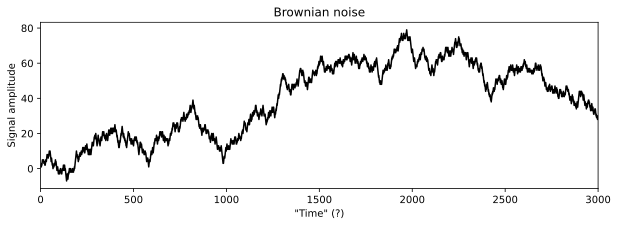

In [13]:
# A brief aside on Brownian noise
brownNoise = np.cumsum(np.random.choice([-1,1],3000))

plt.figure(figsize=(10,3))
plt.plot(brownNoise,'k')
plt.gca().set(xlim=[0,len(brownNoise)],xlabel='"Time" (?)',ylabel='Signal amplitude',title='Brownian noise')
plt.show()

In [17]:
# Brownian noise
brownNoise = np.cumsum(np.random.choice([-1,1],30)) # a random sequence of +1 and -1
print(brownNoise)

BrownianRandomTokens = brownNoise + np.random.choice(nLex, 1)
print(BrownianRandomTokens)
print('')

# test with random token indices
print(f'Brownian random tokens: \n\t{BrownianRandomTokens}\n')
print(f'Decoded text: \n\t{decoder(BrownianRandomTokens, idx2word)}')

[-1  0 -1 -2 -1 -2 -1 -2 -1  0  1  0 -1  0 -1 -2 -3 -4 -3 -4 -5 -6 -7 -8
 -7 -6 -7 -6 -5 -4]
[3551 3552 3551 3550 3551 3550 3551 3550 3551 3552 3553 3552 3551 3552
 3551 3550 3549 3548 3549 3548 3547 3546 3545 3544 3545 3546 3545 3546
 3547 3548]

Brownian random tokens: 
	[3551 3552 3551 3550 3551 3550 3551 3550 3551 3552 3553 3552 3551 3552
 3551 3550 3549 3548 3549 3548 3547 3546 3545 3544 3545 3546 3545 3546
 3547 3548]

Decoded text: 
	shop shops shop shoot shop shoot shop shoot shop shops short shops shop shops shop shoot shook shone shook shone shoes shock shoal shivered shoal shock shoal shock shoes shone


# Exercise 3: Distribution of word lengths

In [26]:
# loop through the words and count the characters per word
numChars = np.zeros(nWords)
for i,w in enumerate(words):
  numChars[i] = len(w)

numChars

array([5., 2., 3., ..., 7., 9., 5.], shape=(30698,))

In [23]:
np.min(numChars)

np.float64(2.0)

In [21]:
max_numChar = np.max(numChars)
max_numChar

np.float64(16.0)

In [22]:
int(max_numChar)

16

In [24]:
np.zeros(int(max_numChar))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
range(len(charCounts))

range(0, 16)

In [29]:
# now count the number of words with those characters
charCounts = np.zeros(int(np.max(numChars)))
for i in range(len(charCounts)):
  charCounts[i] = np.sum(numChars==i+1)

charCounts

array([0.000e+00, 5.323e+03, 7.406e+03, 5.879e+03, 3.647e+03, 2.568e+03,
       2.222e+03, 1.455e+03, 9.950e+02, 6.580e+02, 2.560e+02, 1.950e+02,
       6.200e+01, 2.600e+01, 4.000e+00, 2.000e+00])

In [30]:

# now count the number of words with those characters
charCounts = np.zeros(int(np.max(numChars)))
for i in range(len(charCounts)):
  charCounts[i] = np.sum(numChars==i+1)


# and plot
_,axs = plt.subplots(2,1,figsize=(10,7))
axs[0].scatter(range(nWords),numChars,marker='.',s=10,c=np.linspace(.1,.9,len(numChars)),alpha=.4)
axs[0].set(yticks=range(1,int(np.max(numChars))),xlabel='Token index',xlim=[-15,nWords+15],
           ylabel='Number of characters',title='Character count by token index')

axs[1].bar(range(len(charCounts)),charCounts,edgecolor='k',color=[.9,.7,.9])
axs[1].set(xticks=range(1,len(charCounts)),xlim=[0,len(charCounts)],xlabel='Number of characters',
           ylabel='Token count',title='Histogram of character count frequencies')

plt.tight_layout()
plt.show()

# Exercise 4: Encode a novel sentence

In [31]:
# the text to decode
sentence = 'The space aliens came to Earth to steal watermelons and staplers.'

# preprocess (remove punctuation, make lower-case, split into words)
words_new = re.split(f'[,.\s]+', sentence.lower())

# remove empty items
words_new = [item.strip() for item in words_new if item.strip()]
words_new

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_7367/455406556.py:5: SyntaxWarning: invalid escape sequence '\s'
  words_new = re.split(f'[,.\s]+', sentence.lower())


['the',
 'space',
 'aliens',
 'came',
 'to',
 'earth',
 'to',
 'steal',
 'watermelons',
 'and',
 'staplers']

In [32]:
# tokenize (uh oh...)
encoder(words_new,word2idx)

KeyError: 'aliens'

# Exercise 5: Create a new encoder

In [33]:
# need to update the vocab
word2idx_new = word2idx.copy()
idx2word_new = idx2word.copy()

# add an entry for unknown words
word2idx_new['<|unk|>'] = len(word2idx)+1
idx2word_new[len(idx2word)+1] = '<|unk|>'

In [35]:
# need a new encoder function
def encoder_new(words,encode_dict):

  # initialize a vector of numerical indices
  idxs = np.zeros(len(words),dtype=int)

  # loop through the words and find their token in the vocab
  for i,w in enumerate(words):
    if w in encode_dict:
        idxs[i] = encode_dict[w]
    else:
        idxs[i] = encode_dict['<|unk|>']


  # return the results!
  return idxs

In [36]:
# try again
tokenidx = encoder_new(words_new,word2idx_new)
tokenidx

array([4042, 3734, 4590,  519, 4119, 1191, 4119, 4590, 4590,  137, 4590])

In [37]:
# need a new decoder function?
decoder(tokenidx,idx2word_new)

'the space <|unk|> came to earth to <|unk|> <|unk|> and <|unk|>'

Key Takeaways:

1. Randomly generated tokens are usually nonsensical.
2. There are mathematical relationship between word length and frequency, which has implications for LLM performance.
3.  Tokenizers need special characters to deal with "unknown" tokens.